<a href="https://colab.research.google.com/github/datle2403/datle2403/blob/main/AdAline_randomized_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
class adaline(BaseEstimator, TransformerMixin):
  def __init__(self,iter=50,lr=0.001,random_state=1):
    self.iter=iter
    self.lr=lr
    self.random_state=random_state
  def net_input(self,X):
    return self.w_[0] + np.dot(X,self.w_[1:])
  def linear_activation_function(self,z):
    return z
  def fit(self,X,y):
    self.error_=[]
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    for _ in range(self.iter):
      Z=self.net_input(X)
      A=self.linear_activation_function(Z)
      update=self.lr*(y-A)
      self.w_[0]+=np.sum(update)
      self.w_[1:]+=np.dot(X.T,update)
      error=self.cost_function(X,y)
      self.error_.append(error)
    return self
  def predict(self,X):
    return np.where(self.net_input(X)>0.0,1,-1)
  def cost_function(self,X,y):
    return 1/2*np.sum((y-self.net_input(X))**2)

[48.734405003475466, 47.268121538341724, 46.127493074312454, 45.11577153141929, 44.16300470536643, 43.244135928281686, 42.350009099392544, 41.47710358023412, 40.62389994660111, 39.78959323729818, 38.973637280057545, 38.17558324301583, 37.39502235241281, 36.63156549055842, 35.884835853049346, 35.15446623192374, 34.44009793908688, 33.74138031294905, 33.05797043399405, 32.38953291671958, 31.735739730967378, 31.096270035958685, 30.470810021078176, 29.859052751247802, 29.26069801607837, 28.675452182464248, 28.103028050456267, 27.54314471230968, 26.995527414626324, 26.45990742351922, 25.93602189273203, 25.42361373464812, 24.92243149412579, 24.43222922509762, 23.952766369873352, 23.483807641087196, 23.025122906231452, 22.57648707471985, 22.137679987425287, 21.708486308637532, 21.288695420388127, 20.878101319090366, 20.476502514443947, 20.083701930554284, 19.69950680921833, 19.323728615329287, 18.95618294435364, 18.59668943183545, 18.245071664883135, 17.901157095595575, 17.564776956384865, 17.

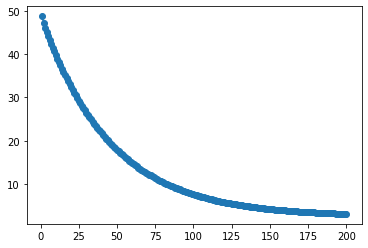

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
#load dataset
df=pd.read_csv('Iris.csv')
X=df.iloc[:100,[1,3]].values
y=df.iloc[:100,5].values
y=np.where(y=='Iris-setosa',-1,1)
ada=adaline(iter=200,lr=0.0001)
ada.fit(X,y)
print(ada.error_)
plt.plot(range(1, len(ada.error_) + 1), ada.error_, marker='o')

In [69]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'iter': [10, 20, 30,50]},
    {'lr':[0.1,0.01,0.001,0.0001]}
  ]
grid_search = GridSearchCV(ada, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in add
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2

GridSearchCV(cv=5, estimator=adaline(iter=200, lr=0.0001),
             param_grid=[{'iter': [10, 20, 30, 50]},
                         {'lr': [0.1, 0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [70]:
grid_search.best_estimator_

adaline(iter=200, lr=0.0001)

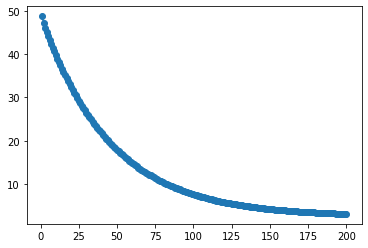

In [81]:
b=grid_search.best_estimator_
plt.plot(range(1, len(ada.error_) + 1), b.error_, marker='o')

In [72]:
b.predict(X)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [77]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal,rv_discrete
#'iter': [10, 20, 30,50]
iter=[i for i in range(0,1000)]
param_distribs = {
        'lr': reciprocal(0.00000000000000000000000000001, 1),
        'iter': iter
    }

rnd_search = RandomizedSearchCV(ada, param_distributions=param_distribs,
                                n_iter=100, cv=2, scoring='neg_mean_absolute_error',
                                verbose=2, random_state=42)
rnd_search.fit(X,y)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV] END ................iter=102, lr=1.2581911293558351e-06; total time=   0.0s
[CV] END ................iter=102, lr=1.2581911293558351e-06; total time=   0.0s
[CV] END ................iter=270, lr=1.6897572268338767e-08; total time=   0.0s
[CV] END ................iter=270, lr=1.6897572268338767e-08; total time=   0.0s
[CV] END ................iter=700, lr=2.0354225443139367e-12; total time=   0.1s
[CV] END ................iter=700, lr=2.0354225443139367e-12; total time=   0.0s
[CV] END ................iter=121, lr=3.3407277896880635e-25; total time=   0.0s
[CV] END ................iter=121, lr=3.3407277896880635e-25; total time=   0.0s
[CV] END .................iter=330, lr=2.080740243922664e-16; total time=   0.0s
[CV] END .................iter=330, lr=2.080740243922664e-16; total time=   0.0s
[CV] END ................iter=372, lr=2.7060470322673302e-12; total time=   0.1s
[CV] END ................iter=372, lr=2.706047

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in add
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in add
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in add


[CV] END ...................iter=308, lr=0.13408670314489354; total time=   0.1s
[CV] END ..................iter=491, lr=0.016520704433740527; total time=   0.1s
[CV] END ..................iter=491, lr=0.016520704433740527; total time=   0.1s
[CV] END .................iter=385, lr=1.874666630898681e-24; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in add


[CV] END .................iter=385, lr=1.874666630898681e-24; total time=   0.1s
[CV] END .................iter=276, lr=8.071677084717723e-12; total time=   0.0s
[CV] END .................iter=276, lr=8.071677084717723e-12; total time=   0.0s
[CV] END ................iter=313, lr=1.6517203416192084e-14; total time=   0.0s
[CV] END ................iter=313, lr=1.6517203416192084e-14; total time=   0.0s
[CV] END ................iter=747, lr=4.6645561596687334e-29; total time=   0.1s
[CV] END ................iter=747, lr=4.6645561596687334e-29; total time=   0.0s
[CV] END .................iter=474, lr=5.542860478685309e-12; total time=   0.0s
[CV] END .................iter=474, lr=5.542860478685309e-12; total time=   0.0s
[CV] END .................iter=681, lr=2.255818911403675e-28; total time=   0.0s
[CV] END .................iter=681, lr=2.255818911403675e-28; total time=   0.0s
[CV] END ................iter=699, lr=4.2120493947261234e-19; total time=   0.0s
[CV] END ................ite

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in add
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in add


[CV] END .................iter=840, lr=7.700097008025534e-28; total time=   0.0s
[CV] END .................iter=840, lr=7.700097008025534e-28; total time=   0.1s
[CV] END ..................iter=387, lr=0.021079044217192523; total time=   0.0s
[CV] END ..................iter=387, lr=0.021079044217192523; total time=   0.0s
[CV] END ..................iter=13, lr=2.776662502513545e-06; total time=   0.0s
[CV] END ..................iter=13, lr=2.776662502513545e-06; total time=   0.0s
[CV] END ..................iter=776, lr=2.90416518213159e-29; total time=   0.0s
[CV] END ..................iter=776, lr=2.90416518213159e-29; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in add
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in add


[CV] END .................iter=897, lr=6.962380735564612e-10; total time=   0.0s
[CV] END .................iter=897, lr=6.962380735564612e-10; total time=   0.0s
[CV] END .................iter=366, lr=6.525924513754361e-10; total time=   0.0s
[CV] END .................iter=366, lr=6.525924513754361e-10; total time=   0.0s
[CV] END ................iter=427, lr=2.2915555695743363e-15; total time=   0.0s
[CV] END ................iter=427, lr=2.2915555695743363e-15; total time=   0.0s
[CV] END ................iter=942, lr=1.0655527437966116e-24; total time=   0.0s
[CV] END ................iter=942, lr=1.0655527437966116e-24; total time=   0.0s
[CV] END .................iter=80, lr=3.1960934302392857e-22; total time=   0.0s
[CV] END .................iter=80, lr=3.1960934302392857e-22; total time=   0.0s
[CV] END .................iter=871, lr=8.044163685850512e-08; total time=   0.0s
[CV] END .................iter=871, lr=8.044163685850512e-08; total time=   0.0s
[CV] END .................it

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in add
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in add
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeW

[CV] END .................iter=862, lr=0.0054244138437872244; total time=   0.1s
[CV] END ................iter=455, lr=3.4904004643570684e-13; total time=   0.0s
[CV] END ................iter=455, lr=3.4904004643570684e-13; total time=   0.0s
[CV] END ................iter=251, lr=2.0492331766921773e-28; total time=   0.0s
[CV] END ................iter=251, lr=2.0492331766921773e-28; total time=   0.0s
[CV] END ................iter=295, lr=3.1008560933263575e-05; total time=   0.0s
[CV] END ................iter=295, lr=3.1008560933263575e-05; total time=   0.0s
[CV] END ................iter=748, lr=7.3981293692076295e-22; total time=   0.0s
[CV] END ................iter=748, lr=7.3981293692076295e-22; total time=   0.0s
[CV] END ..................iter=52, lr=1.037012053259048e-12; total time=   0.0s
[CV] END ..................iter=52, lr=1.037012053259048e-12; total time=   0.0s
[CV] END ................iter=216, lr=1.4031392746217158e-21; total time=   0.0s
[CV] END ................ite

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in add
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in square


RandomizedSearchCV(cv=2, estimator=adaline(iter=200, lr=0.0001), n_iter=100,
                   param_distributions={'iter': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                 10, 11, 12, 13, 14, 15, 16, 17,
                                                 18, 19, 20, 21, 22, 23, 24, 25,
                                                 26, 27, 28, 29, ...],
                                        'lr': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f018b6e0710>},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [78]:
rnd_search.best_params_

{'iter': 40, 'lr': 0.0034184606947186436}

In [79]:
best=rnd_search.best_estimator_
print(best)

adaline(iter=40, lr=0.0034184606947186436)


In [80]:
best.error_

[359.94503036124314,
 55995.063167072694,
 9236910.853328574,
 1523973791.0198958,
 251436596973.03842,
 41483890876662.3,
 6844322676190948.0,
 1.129227560527073e+18,
 1.863084111872386e+20,
 3.0738555533405257e+22,
 5.071476860648349e+24,
 8.367301944341683e+26,
 1.38050007426897e+29,
 2.2776523038533344e+31,
 3.7578411721531364e+33,
 6.199967506558713e+35,
 1.0229170239347575e+38,
 1.687685035040323e+40,
 2.7844690340012598e+42,
 4.594025330755309e+44,
 7.579566690060699e+46,
 1.2505336186213905e+49,
 2.0632239219598267e+51,
 3.4040611853683406e+53,
 5.616274816513554e+55,
 9.266150370675923e+57,
 1.5287988123287435e+60,
 2.5223266567897143e+62,
 4.1615232247995124e+64,
 6.865992358256853e+66,
 1.1328027867947943e+69,
 1.8689827876473836e+71,
 3.083587629940175e+73,
 5.087533568722203e+75,
 8.39379350259536e+77,
 1.3848708497447405e+80,
 2.2848635362303315e+82,
 3.7697388028329387e+84,
 6.219597107768692e+86,
 1.0261556624001195e+89]

In [82]:
best.predict(X)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])